<a href="https://colab.research.google.com/github/hermannvargens/Introducao_IA_Enq_Quimica/blob/main/Atividade_8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Geração do conjunto de dados

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

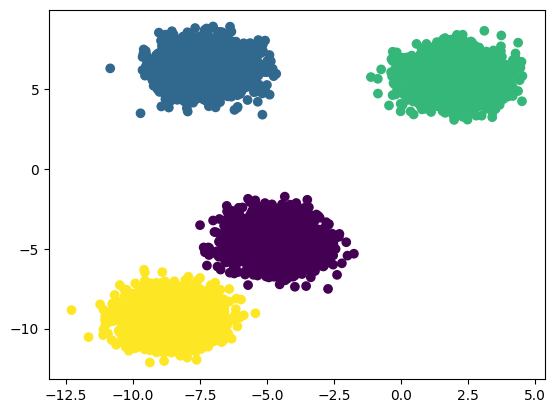

In [2]:
seed = 16110 # número da matrícula
X, y, centers = make_blobs(n_samples=10000, centers=4, cluster_std=0.85, return_centers=True, random_state=seed)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

## Parte 1: Clustering

### Visualizar os clusters com as centróides

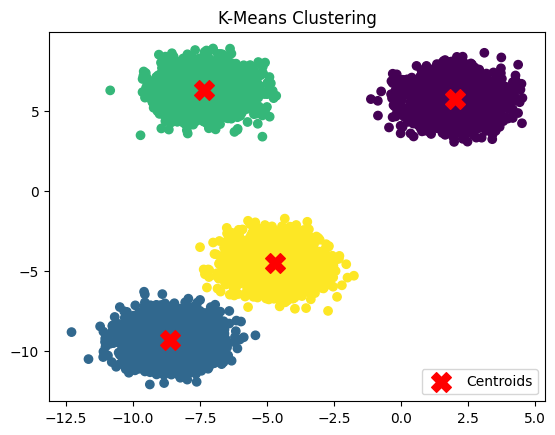

In [3]:
from sklearn.cluster import KMeans

# Instanciar o modelo
kmeans = KMeans(n_clusters=4, random_state=seed, n_init=10)
kmeans.fit(X)

# obter os rótulos dos clusters e centróides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# visualizar os resultados
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.legend()
plt.title('K-Means Clustering')
plt.show()

## Calcular Inertia para cada número de clusters

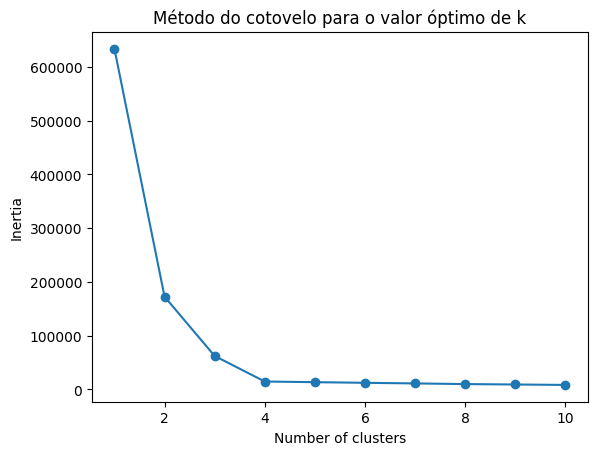

In [4]:
# Calcular inertia para os valores de 2 a 10 clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=seed, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Método do cotovelo para o valor óptimo de k')
plt.show()

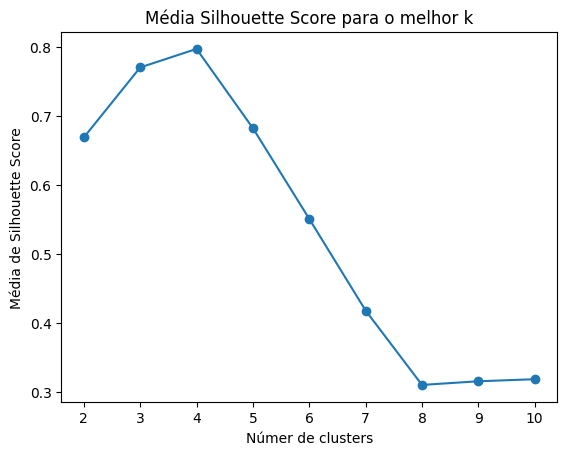

In [5]:
from sklearn.metrics import silhouette_score

# Calcular os scores de silhueta para cada número de cluster de 2 a 10
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=seed, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# plotar o gráfico de silhueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Númer de clusters')
plt.ylabel('Média de Silhouette Score')
plt.title('Média Silhouette Score para o melhor k')
plt.show()

## Determinar a distância entre as centróides verdadeiras e as centróides calculadas pelo K-means

In [6]:
from sklearn.metrics import pairwise_distances

distances = []
for true_center in centers:
    min_distance = min([pairwise_distances([true_center], [centroid])[0][0] for centroid in centroids])
    distances.append(min_distance)

print("Distâncias entre as centróides verdadeiras e as centróides calculadas pelo K-Means")
for i, dist in enumerate(distances):
    print(f"Centróide Verdadeira {i+1} para a centróide calculada pelo KMeans: {dist}")

Distâncias entre as centróides verdadeiras e as centróides calculadas pelo K-Means
Centróide Verdadeira 1 para a centróide calculada pelo KMeans: 0.03414896070573499
Centróide Verdadeira 2 para a centróide calculada pelo KMeans: 0.021382649860724683
Centróide Verdadeira 3 para a centróide calculada pelo KMeans: 0.029859418040984183
Centróide Verdadeira 4 para a centróide calculada pelo KMeans: 0.0177270879192065


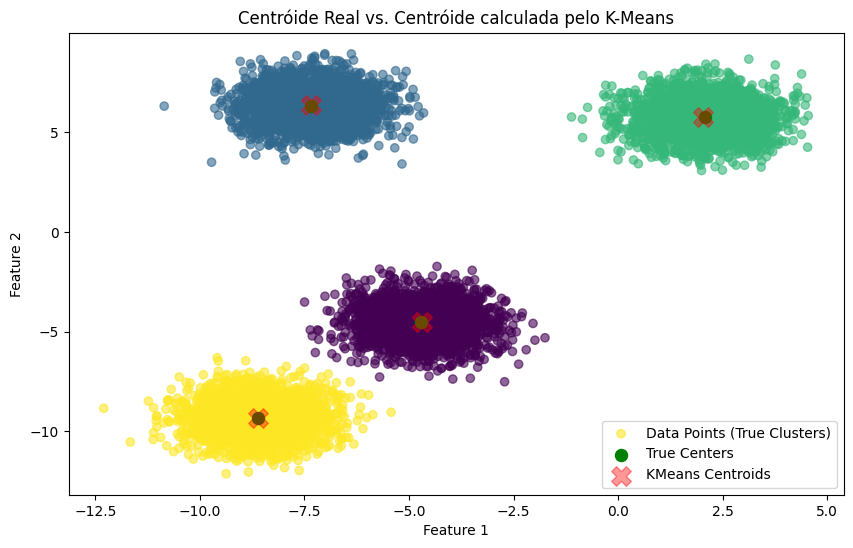

In [7]:
# Visualizar o dataset, com as centróides verdadeiras e as centróides calculadas pelo K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, label='Data Points (True Clusters)')
plt.scatter(centers[:, 0], centers[:, 1], marker='.', s=300, c='green', label='True Centers')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', alpha=0.4, s=200, c='red', label='KMeans Centroids')
plt.title('Centróide Real vs. Centróide calculada pelo K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Parte 2: Aprendizagem semi-supervisionada

## Seleção de amostra do dataset

In [30]:
import numpy as np

# Selecionar 1% das amostras aleatoriamente
num_labeled_samples = int(0.01 * len(X))
# Obter os rótulos das amostras
labeled_indices = np.random.choice(len(X), size=num_labeled_samples, replace=False)

#Determinar o rótulo das demais amostras

# Criar um novo array com os rótulos para aprendizagem semi-supervisionada
# Inicializar todos os rótulos igual a -1
y_semi_supervised = np.full(len(X), -1)

# Atribuir os rótulos originais às amostras selecionadas.
y_semi_supervised[labeled_indices] = y[labeled_indices]

print(f"Número de amostras rotuladas: {num_labeled_samples}")
print(f"Primeiros 10 rótulos semi-supervisionados: {y_semi_supervised[:10]}")

Número de amostras rotuladas: 100
Primeiros 10 rótulos semi-supervisionados: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


## Predição dos rótulos para o restante do dataset

In [31]:
from sklearn.semi_supervised import LabelSpreading

# Instanciar o modelo LabelSpreading
label_spreading = LabelSpreading(kernel='knn', alpha=0.2, max_iter=30, n_neighbors=7)

# Ajustar o modelo com os rótulos semi supervisionados
label_spreading.fit(X, y_semi_supervised)

# Predizer os rótulos para todas as amostras
predicted_labels = label_spreading.transduction_

print("Primeiras 10 predições")
print(predicted_labels[:10])

Primeiras 10 predições
[3 0 0 0 0 0 3 2 0 3]


## Cálculo da acurácia

In [32]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the predicted labels
accuracy = accuracy_score(y, predicted_labels)

print(f"Accuracy of LabelSpreading: {accuracy}")

Accuracy of LabelSpreading: 0.7331


#  Gráfico da acurácia em função da fração dos dados rotulados inicialmente, no intervalo 0.1% - 10%

Primeiramente, vamos gerar uma lista contendo valores de 0,1% a 10%:



In [38]:
labeled_fractions = [i / 1000.0 for i in range(1, 101)]
print(labeled_fractions[:10])
print(labeled_fractions[-10:])

[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
[0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099, 0.1]


Para cada fração de 0,1% a 10%, ajustar o modelo de aprendizagem semi-supervisionada e calcular a acurácia.



In [39]:
accuracies = []
for fraction in labeled_fractions:
    num_labeled_samples = int(fraction * len(X)) #quantidade de amostras rotuladas
    labeled_indices = np.random.choice(len(X), size=num_labeled_samples, replace=False) #obter os índices das amostras

    y_semi_supervised = np.full(len(X), -1) #rotular o restante das amostras como -1
    y_semi_supervised[labeled_indices] = y[labeled_indices]

    label_spreading = LabelSpreading(kernel='knn', alpha=0.2, max_iter=30, n_neighbors=4) #instanciar o modelo
    label_spreading.fit(X, y_semi_supervised) #treinar o modelo
    predicted_labels = label_spreading.transduction_ #predizer os rótulos

    accuracy = accuracy_score(y, predicted_labels) #calcular a acurácia para cada fração
    accuracies.append(accuracy)

Plotar resultados:

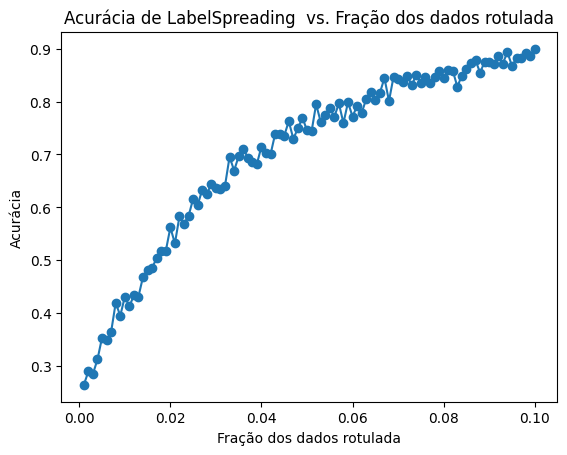

In [40]:
plt.plot(labeled_fractions, accuracies, marker='o')
plt.xlabel('Fração dos dados rotulada')
plt.ylabel('Acurácia')
plt.title('Acurácia de LabelSpreading  vs. Fração dos dados rotulada')
plt.show()

Podemos facilmente verificar que, quanto maior a fração de dados que foi rotulada, maior a acurácia.